# Predict Loan Payment using DecisionTrees & RandomForest

Use Lending Club Loan Data (2007-2011) to predict if borrowers would pay back

The dataset used here is generated using sklearn.datasets.make_classification with 1000 samples, 4 features, 2 informative, 0 redundant.

### Load Packages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

### Load Data

In [10]:
# Load Iris Dataset
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add target label
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

### Create Training/Test Sets

In [11]:
# Label data to divide into train/test sets
df_iris['is_train'] = np.random.uniform(0, 1, len(df_iris)) <= 0.75

# Split data into train/test sets
df_train, df_test = df_iris[df_iris['is_train'] == True], df_iris[df_iris['is_train'] == False]

# Create numerical target variable
y_train = pd.factorize(df_train['species'])[0]
y_test = pd.factorize(df_test['species'])[0]

# Get name of features
features = df_iris.columns[:4]

print('Total Number of samples: ', len(df_iris))
print('Number of samples in train set: ', len(df_train))
print('Number of samples in test set: ', len(df_test))

Total Number of samples:  150
Number of samples in train set:  113
Number of samples in test set:  37


### Train Random Forest Classifier

In [17]:
# Create Random Forest 
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train Random Forest
clf.fit(df_train[features], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

### Test Random Forest Classifier

In [21]:
# Get Predictions
y_pred = clf.predict(df_test[features])

# Get Prediction Probabilities
y_pred_p = clf.predict_proba(df_test[features])

### Evaluate Random Forest

In [22]:
# Create Labels of Predictions
y_pred_label = iris.target_names[y_pred]

### Compute Confussion Matrix

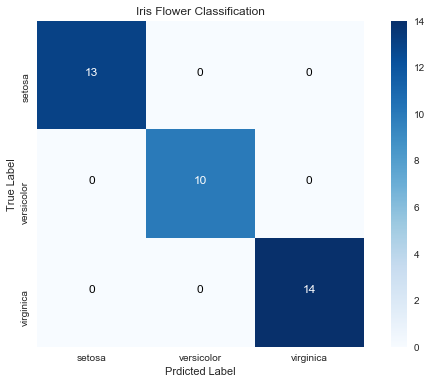

In [25]:
# Compute confussion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confussion Matrix
np.set_printoptions(precision=2)
plt.figure()
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Iris Flower Classification')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, iris.target_names)
plt.yticks(tick_marks, iris.target_names,rotation=90)

for i, j in it.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])) :
    plt.text(j,i,cnf_matrix[i][j], horizontalalignment="center", color="white" if cnf_matrix[i,j] > cnf_matrix.max()/2 else "black")

plt.ylabel('True Label')
plt.xlabel('Prdicted Label')
plt.tight_layout()
plt.grid('off')
plt.show()


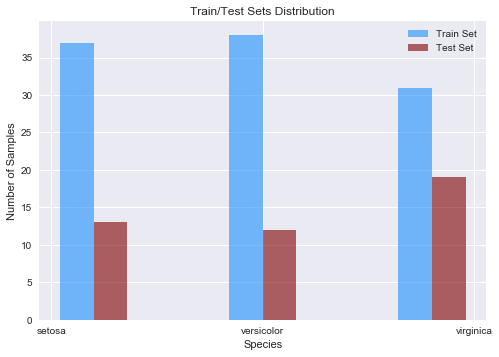

In [10]:
# Plot Train Set Distribution
plt.figure
plt.hist([y_train, y_test], bins=5, label=['Train Set', 'Test Set'], alpha=0.6, color=['dodgerblue','maroon'], align='mid')
plt.legend()
plt.xticks(range(3),iris.target_names)
plt.xlabel('Species')
plt.ylabel('Number of Samples')
plt.title('Train/Test Sets Distribution')
plt.show()


In [11]:
# Plot Features Importance Score
df_imp = pd.DataFrame(clf.feature_importances_).transpose()
df_imp.columns = features

df_imp


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.073911          0.055485           0.394374           0.47623

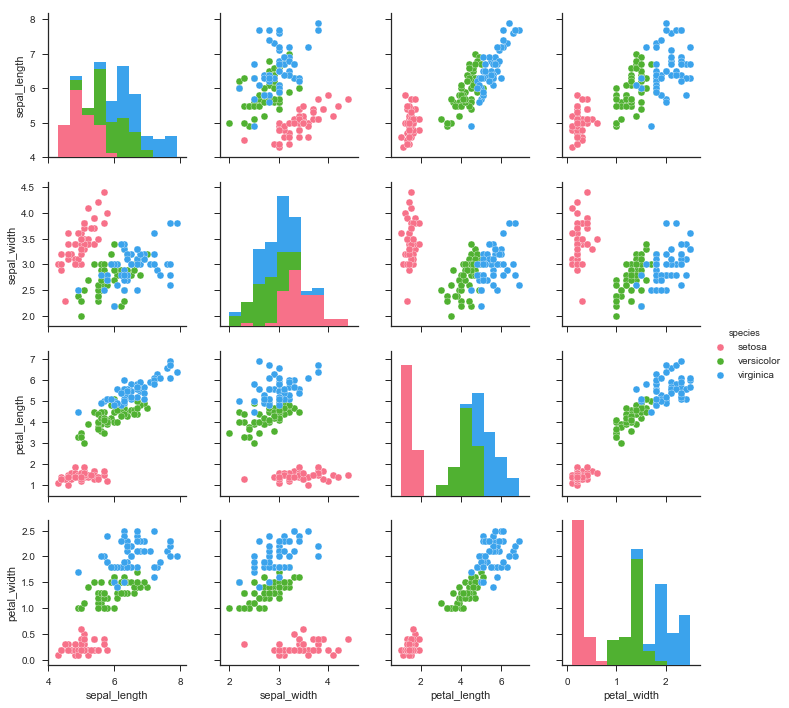

In [12]:
# Plot Pairwise Relationship Between Features

import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species", palette="husl")
plt.show()